## Relax Data Science Challenge

Task: Defining an "adopted user" as a user who has logged into the product on three separate
days in at least one seven­day period , identify which factors predict future user
adoption .

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta
from pylab import rcParams
import os
os.chdir('/home/roman/Documents/Projects/Springboard/17.1 Take Home challenge/relax_challenge')

In [2]:
# load and sort data:
df_user_eng = pd.read_csv('takehome_user_engagement.csv')
df_user = pd.read_csv('takehome_users.csv', encoding = "ISO-8859-1")
df_user['creation_time'] = pd.to_datetime(df_user['creation_time'])
df_user['last_session_creation_time'] = pd.to_datetime(df_user['last_session_creation_time'])
df_user_eng['time_stamp'] = pd.to_datetime(df_user_eng['time_stamp'])
df_user_eng = df_user_eng.sort_values(['user_id', 'time_stamp'])
user_ids = list(set(df_user_eng['user_id']))

In [3]:
# construct dataframe with info on user adoption:
np_user_adopt = np.array([np.array(user_ids), np.zeros(len(user_ids))]).transpose()
df_user_adopt = pd.DataFrame(data=np_user_adopt, columns=['user_id', 'adopted'])
for user_id in user_ids:
    ts_list = df_user_eng[df_user_eng['user_id'] == user_id]['time_stamp']
    if len(ts_list) >= 2:
        for i in range(2, len(ts_list)):
            if (ts_list.iloc[i] - ts_list.iloc[i - 2]).days < 7:
                index = df_user_adopt[df_user_adopt['user_id']==user_id].index
                df_user_adopt.iloc[index, 1] = 1
                continue

In [4]:
# merge data frames and drop irrelevant features
df_user_final = pd.merge(df_user, df_user_adopt, left_on='object_id', right_on='user_id', how='left')
df_user_final = df_user_final.drop('user_id', axis=1).fillna(0)
# create new feature 'invited' -> 1 if invited by other user, 0 if not
df_user_final['invited'] = (df_user_final['invited_by_user_id'] > 0).astype(int)
df_user_final = df_user_final.drop('invited_by_user_id', axis=1)

The task is to find which of the factors are valuable to predict future user adoption. To find out about this, we will look at the factors one by one and determine their whether or not they are valuable through looking at the correlation between each factor and the response variable. Let's take a look at the variables one by one.

In [5]:
print(df_user_final.columns)

Index(['object_id', 'creation_time', 'name', 'email', 'creation_source',
       'last_session_creation_time', 'opted_in_to_mailing_list',
       'enabled_for_marketing_drip', 'org_id', 'adopted', 'invited'],
      dtype='object')


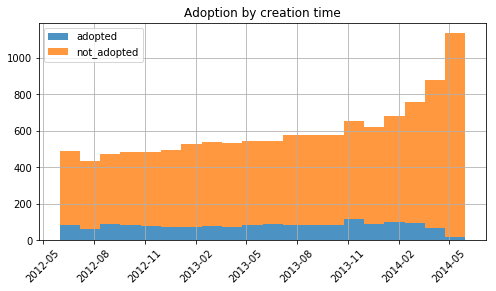

In [6]:
# Creation time
df_user_final_adopted = df_user_final[df_user_final['adopted']==1]
df_user_final_not_adopted = df_user_final[df_user_final['adopted']==0]

df_user_final_adopted_creation = list(df_user_final_adopted['creation_time'])
df_user_final_not_adopted_creation = list(df_user_final_not_adopted['creation_time'])

rcParams['figure.figsize'] = 8, 4
names = ['adopted', 'not_adopted']
plt.hist([df_user_final_adopted_creation, df_user_final_not_adopted_creation],
         bins=20, label=names, stacked=True, alpha=0.8)
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.title('Adoption by creation time')
plt.show()

Creation time has some but not a strong impact on adoption. What stands out is that more recently created accounts have a smaller adoption ratio. However, a reason for this might be that these users didn't yet adopt the app (but will probably do so in the future).

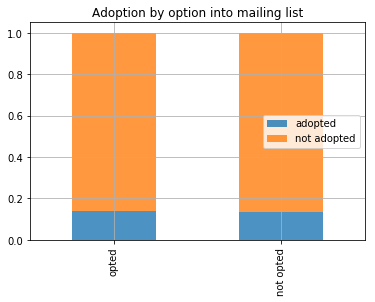

Correlation between "opted into mailing list" and "user adoption": 0.008097475095150306


In [7]:
# Opted into mailing list
df_user_opt = df_user_final[df_user_final['opted_in_to_mailing_list']==1]
df_user_not_opt = df_user_final[df_user_final['opted_in_to_mailing_list']==0]

user_opt_adopted = sum(df_user_opt['adopted']==1) / df_user_opt.shape[0]
user_opt_not_adopted = 1 - user_opt_adopted
user_not_opt_adopted = sum(df_user_not_opt['adopted']==1) / df_user_not_opt.shape[0]
user_not_opt_not_adopted = 1 - user_not_opt_adopted
df_pivot = pd.DataFrame(np.array([[user_opt_adopted, user_opt_not_adopted], 
                       [user_not_opt_adopted, user_not_opt_not_adopted]]),
            columns=['adopted', 'not adopted'], index=['opted','not opted'])
rcParams['figure.figsize'] = 6, 4
df_pivot.plot.bar(stacked=True, alpha=0.8)
plt.legend(loc='right')
plt.title('Adoption by option into mailing list')
plt.grid()
plt.show()
cor = np.corrcoef(df_user_final['opted_in_to_mailing_list'], df_user_final['adopted'])[0, 1]
print('Correlation between "opted into mailing list" and "user adoption": ' + str(cor))

The plot above shows that the ratio of adopted vs not adopted is almost identical for the groups 'opted into mailing list' and 'did not opt into mailing list'. The correlation is almost 0 as well. This shows that 'opted into mailing list' is not a good indicator for user adoption.

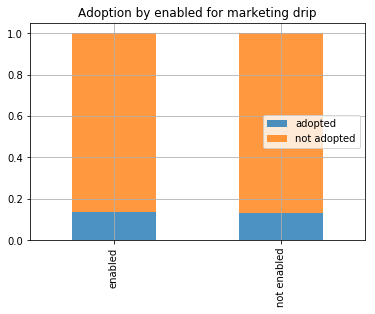

Correlation between "enabled_for_marketing_drip" and "user adoption": 0.004652604113303387


In [8]:
# enabled_for_marketing_drip
df_user_en = df_user_final[df_user_final['enabled_for_marketing_drip']==1]
df_user_not_en = df_user_final[df_user_final['enabled_for_marketing_drip']==0]

user_en_adopted = sum(df_user_en['adopted']==1) / df_user_en.shape[0]
user_en_not_adopted = 1 - user_en_adopted
user_not_en_adopted = sum(df_user_not_en['adopted']==1) / df_user_not_en.shape[0]
user_not_en_not_adopted = 1 - user_not_en_adopted
df_pivot = pd.DataFrame(np.array([[user_en_adopted, user_en_not_adopted], 
                       [user_not_en_adopted, user_not_en_not_adopted]]),
            columns=['adopted', 'not adopted'], index=['enabled','not enabled'])
rcParams['figure.figsize'] = 6, 4
df_pivot.plot.bar(stacked=True, alpha=0.8)
plt.legend(loc='right')
plt.title('Adoption by enabled for marketing drip')
plt.grid()
plt.show()
cor = np.corrcoef(df_user_final['enabled_for_marketing_drip'], df_user_final['adopted'])[0, 1]
print('Correlation between "enabled_for_marketing_drip" and "user adoption": ' + str(cor))

According to the plot above, whether or not a user is enabled for arketing drip also does not appear to be a strong indicator for user adoption. The correlation is again close to 0.

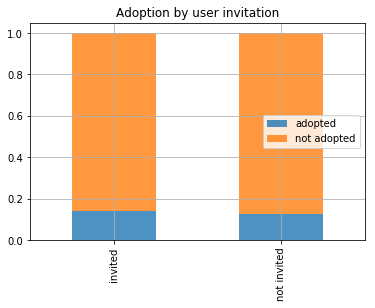

Correlation between "invited" and "user adoption": 0.02767061783010389


In [9]:
# invited
df_user_inv = df_user_final[df_user_final['invited']==1]
df_user_not_inv = df_user_final[df_user_final['invited']==0]

user_inv_adopted = sum(df_user_inv['adopted']==1) / df_user_inv.shape[0]
user_inv_not_adopted = 1 - user_inv_adopted
user_not_inv_adopted = sum(df_user_not_inv['adopted']==1) / df_user_not_inv.shape[0]
user_not_inv_not_adopted = 1 - user_not_inv_adopted
df_pivot = pd.DataFrame(np.array([[user_inv_adopted, user_inv_not_adopted], 
                       [user_not_inv_adopted, user_not_inv_not_adopted]]),
            columns=['adopted', 'not adopted'], index=['invited','not invited'])
rcParams['figure.figsize'] = 6, 4
df_pivot.plot.bar(stacked=True, alpha=0.8)
plt.legend(loc='right')
plt.title('Adoption by user invitation')
plt.grid()
plt.show()
cor = np.corrcoef(df_user_final['invited'], df_user_final['adopted'])[0, 1]
print('Correlation between "invited" and "user adoption": ' + str(cor))

User that have been invited seem to be slightly more likely to be adopted than users who have not. However, the correltation is weak, so user invitation by itself is not a strong predictor for user adoption.

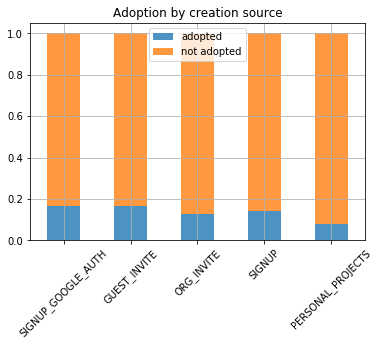

Correlation between SIGNUP_GOOGLE_AUTH and user adoption: 0.036
Correlation between GUEST_INVITE and user adoption: 0.045
Correlation between ORG_INVITE and user adoption: -0.008
Correlation between SIGNUP and user adoption: 0.009
Correlation between PERSONAL_PROJECTS and user adoption: -0.076


In [10]:
# Creation source
sources = set(df_user_final['creation_source'])
df_creation_source = df_user_final[['creation_source', 'adopted']]
d = {}
for source in sources:
    d[source] = [sum(df_user_final[df_user_final['creation_source']==source]['adopted']==1)
                 / df_user_final[df_user_final['creation_source']==source].shape[0],
                 sum(df_user_final[df_user_final['creation_source']==source]['adopted']==0)
                 / df_user_final[df_user_final['creation_source']==source].shape[0]]
df = pd.DataFrame(d).T
df.columns = ['adopted', 'not adopted']
df.plot.bar(stacked=True, alpha=0.8)
plt.xticks(rotation=45)
plt.grid()
plt.title('Adoption by creation source')
plt.show()

df_dummies = pd.concat([pd.get_dummies(df_user_final['creation_source']), 
                        df_user_final['adopted']], axis=1)
for source in sources:
    print('Correlation between {0} and user adoption: '.format(source) +
          str(np.round(np.corrcoef(df_dummies[source], df_dummies['adopted'])[0, 1], 3)))

The plot above shows that the kind of user creation gives some indication on user adoption. Users invited to an organization as a guest are the ones that are most likely to be adopted, users from personal projects (invited to join another user's personal workspace) are the ones least likely to be adopted.

#### Conclusion

Predicting user adoption is not an easy task as most of the variables available are not strongly correlated with user adoption. The strongest predictors are the creation source (how their account was created) and the creaion time (when the account was created).